In [1]:
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

# ODEINT 常微分方程

The second order differential equation for the angle theta of a pendulum acted on by gravity with friction can be written:

$ \theta''(t) + b*\theta'(t) + c*sin(\theta(t)) = 0 $

where b and c are positive constants, and a prime (‘) denotes a derivative. To solve this equation with odeint, we must first convert it to a system of first order equations. By defining the angular velocity omega(t) = theta'(t), we obtain the system:

$ \theta'(t) = \omega(t) $

$ \omega'(t) = -b*\omega(t) - c*sin(\theta(t)) $

Let y be the vector $[\theta, \omega]$. We implement this system in Python as:

In [2]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

We assume the constants are b = 0.25 and c = 5.0:

In [3]:
b = 0.25
c = 5.0

For initial conditions, we assume the pendulum is nearly vertical with theta(0) = pi - 0.1, and is initially at rest, so omega(0) = 0. Then the vector of initial conditions is

对于初始条件，我们假设摆几乎垂直，θ(0)=pi-0.1，并且最初是静止的，所以omega(0)=0。那么初始条件的向量是

In [4]:
# y0 = [np.pi - 0.1, 0.0]
y0 = np.array([np.pi - 0.1, 0.0])


We will generate a solution at 101 evenly spaced samples in the interval 0 <= t <= 10. So our array of times is:

我们将在间隔0&lt;=t&lt;=10的101个均匀分布的样本上生成一个解。因此，我们的时间数组是：

In [5]:
t = np.linspace(0, 10, 101)

Call odeint to generate the solution. To pass the parameters b and c to pend, we give them to odeint using the args argument.

调用odeint以生成解决方案。要将参数b和c传递给pend，我们使用args参数将它们传递给odeint。

In [6]:
sol = odeint(pend, y0, t, args=(b, c))

The solution is an array with shape (101, 2). The first column is theta(t), and the second is omega(t). The following code plots both components.

解是一个形状为(101，2)的数组。第一列是theta(T)，第二列是omega(T)。下面的代码绘制这两个组件。

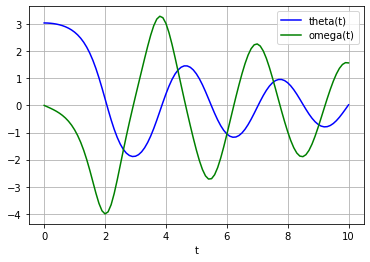

In [7]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint

# scipy.integrate.odeint
scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)  [source]

Integrate a system of ordinary differential equations.

### Note
For new code, use scipy.integrate.solve_ivp to solve a differential equation.

Solve a system of ordinary differential equations using lsoda from the FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems of first order ode-s:

dy/dt = func(y, t, ...)  [or func(t, y, ...)]
where y can be a vector.

### Note
By default, the required order of the first two arguments of func are in the opposite order of the arguments in the system definition function used by the scipy.integrate.ode class and the function scipy.integrate.solve_ivp. To use a function with the signature func(t, y, ...), the argument tfirst must be set to True.

## Parameters

#### func callable(y, t, …) or callable(t, y, …)
Computes the derivative of y at t. If the signature is callable(t, y, ...), then the argument tfirst must be set True.

#### y0 array
Initial condition on y (can be a vector).

#### t array
A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#### args tuple, optional
Extra arguments to pass to function.

#### Dfun callable(y, t, …) or callable(t, y, …)
Gradient (Jacobian) of func. If the signature is callable(t, y, ...), then the argument tfirst must be set True.

#### col_deriv bool, optional
True if Dfun defines derivatives down columns (faster), otherwise Dfun should define derivatives across rows.

#### full_output bool, optional
True if to return a dictionary of optional outputs as the second output

#### printmessg bool, optional
Whether to print the convergence message

#### tfirst: bool, optional
If True, the first two arguments of func (and Dfun, if given) must t, y instead of the default y, t.

New in version 1.1.0.

## Returns
#### y array, shape (len(t), len(y0))
Array containing the value of y for each desired time in t, with the initial value y0 in the first row.

#### infodict dict, only returned if full_output == True
Dictionary containing additional output information

key

meaning

‘hu’

vector of step sizes successfully used for each time step

‘tcur’

vector with the value of t reached for each time step (will always be at least as large as the input times)

‘tolsf’

vector of tolerance scale factors, greater than 1.0, computed when a request for too much accuracy was detected

‘tsw’

value of t at the time of the last method switch (given for each time step)

‘nst’

cumulative number of time steps

‘nfe’

cumulative number of function evaluations for each time step

‘nje’

cumulative number of jacobian evaluations for each time step

‘nqu’

a vector of method orders for each successful step

‘imxer’

index of the component of largest magnitude in the weighted local error vector (e / ewt) on an error return, -1 otherwise

‘lenrw’

the length of the double work array required

‘leniw’

the length of integer work array required

‘mused’

a vector of method indicators for each successful time step: 1: adams (nonstiff), 2: bdf (stiff)

Other Parameters
ml, muint, optional
If either of these are not None or non-negative, then the Jacobian is assumed to be banded. These give the number of lower and upper non-zero diagonals in this banded matrix. For the banded case, Dfun should return a matrix whose rows contain the non-zero bands (starting with the lowest diagonal). Thus, the return matrix jac from Dfun should have shape (ml + mu + 1, len(y0)) when ml >=0 or mu >=0. The data in jac must be stored such that jac[i - j + mu, j] holds the derivative of the i`th equation with respect to the `j`th state variable. If `col_deriv is True, the transpose of this jac must be returned.

rtol, atolfloat, optional
The input parameters rtol and atol determine the error control performed by the solver. The solver will control the vector, e, of estimated local errors in y, according to an inequality of the form max-norm of (e / ewt) <= 1, where ewt is a vector of positive error weights computed as ewt = rtol * abs(y) + atol. rtol and atol can be either vectors the same length as y or scalars. Defaults to 1.49012e-8.

tcritndarray, optional
Vector of critical points (e.g., singularities) where integration care should be taken.

h0float, (0: solver-determined), optional
The step size to be attempted on the first step.

hmaxfloat, (0: solver-determined), optional
The maximum absolute step size allowed.

hminfloat, (0: solver-determined), optional
The minimum absolute step size allowed.

ixprbool, optional
Whether to generate extra printing at method switches.

mxstepint, (0: solver-determined), optional
Maximum number of (internally defined) steps allowed for each integration point in t.

mxhnilint, (0: solver-determined), optional
Maximum number of messages printed.

mxordnint, (0: solver-determined), optional
Maximum order to be allowed for the non-stiff (Adams) method.

mxordsint, (0: solver-determined), optional
Maximum order to be allowed for the stiff (BDF) method.

See also
solve_ivp
solve an initial value problem for a system of ODEs

ode
a more object-oriented integrator based on VODE

quad
for finding the area under a curve

洛仑兹吸引子的详细介绍http://bzhang.lamost.org/website/archives/lorenz_attactor

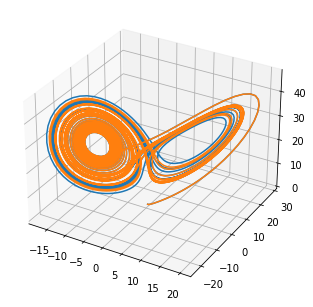

In [8]:
# 洛伦兹吸引子方程
def lorenz(w, t, p, r, b):
    # 给出位置矢量w，和三个参数p, r, b计算出
    # dx/dt, dy/dt, dz/dt的值
    x, y, z = w
    # 直接与lorenz的计算公式对应
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z])
#这三个方程定义了三维空间中各个坐标点上的速度矢量。从某个坐标开始沿着速度矢量进行积分，就可以计算出无质量点在此空间中的运动轨迹。其中 , ,  为三个常数，不同的参数可以计算出不同的运动轨迹： x(t), y(t), z(t)。 当参数为某些值时，轨迹出现馄饨现象：即微小的初值差别也会显著地影响运动轨迹。下面是洛仑兹吸引子的轨迹计算和绘制程序

t = np.arange(0, 30, 0.01) # 创建时间点
# 调用ode对lorenz进行求解, 用两个不同的初始值
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))

# 绘图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2])
ax.plot(track2[:,0], track2[:,1], track2[:,2])
plt.show()

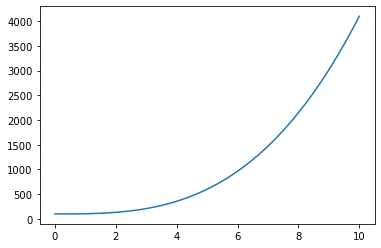

In [9]:
initial = 100
derivative1 = 0
def f1(y,x):
    return 12*x**2
x = np.linspace(0,10,100)
result1 = odeint(f1,initial,x)
plt.plot(x,result1)

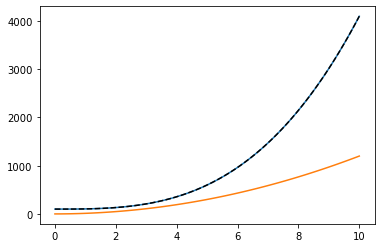

In [10]:
# def f2(y,x):
#     y1,w = y
#     return np.array([w,24*x]) #返回值列阵 先一阶 再 二阶 由低到高
# x = np.linspace(0,10,100)
# # result2 = odeint(f2,(initial,derivative1),x)  #初值对应 先原方程 再 一阶 由低到高
# result2 = odeint(f2,(derivative1,initial),x)  #初值对应 先一阶 再 原方程  会出现错误

# plt.plot(x,result2)
# plt.plot(x,result1,'--k')




def f2(y,x):
    # y1,w = y
    # return np.array([w,24*x]) 
    return np.array([y[1],24*x])   #用这种方式也可以 便不需要中间变量
x = np.linspace(0,10,100)

result2 = odeint(f2,(initial,derivative1),x)  

plt.plot(x,result2)
plt.plot(x,result1,'--k')

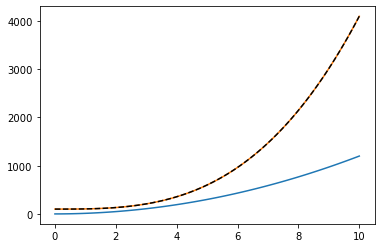

In [11]:
def f3(y,x):
    # y1,w = y
    w,Y1=y                   #也必须 换顺序才可以得到正确结果
    return np.array([24*x,w]) #返回值列阵 先二阶 再 一阶 
x = np.linspace(0,10,100)
# result3 = odeint(f3,(initial,derivative1),x)  # 先原方程   再 一阶 则结果错误
result3 = odeint(f3,(derivative1,initial),x)  #初值对应 先一阶 再 原方程 
plt.plot(x,result3)
plt.plot(x,result1,'--k')
#得到结论  三个位置的顺序必须完全相同  正序 逆序 都可以，但三个必须保持一致，才能出现正确的结果

综上三个程序所述，赋值顺序 应该保持一致才可